d:\Apk\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.2527 - loss: 1.9804 - val_accuracy: 0.4842 - val_loss: 1.4411
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.4704 - loss: 1.4583 - val_accuracy: 0.5473 - val_loss: 1.2573
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5369 - loss: 1.2939 - val_accuracy: 0.5990 - val_loss: 1.1399
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5860 - loss: 1.1700 - val_accuracy: 0.6336 - val_loss: 1.0492
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6178 - loss: 1.0929 - val_accuracy: 0.6439 - val_loss: 1.0028
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6505 - loss: 1.0087 - val_accuracy: 0.6496 - val_loss: 0.9992
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6611 - loss: 0.9655 - val_accuracy: 0.6575 - val_loss: 0.9825
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6823 - loss: 0.9123 - val_a

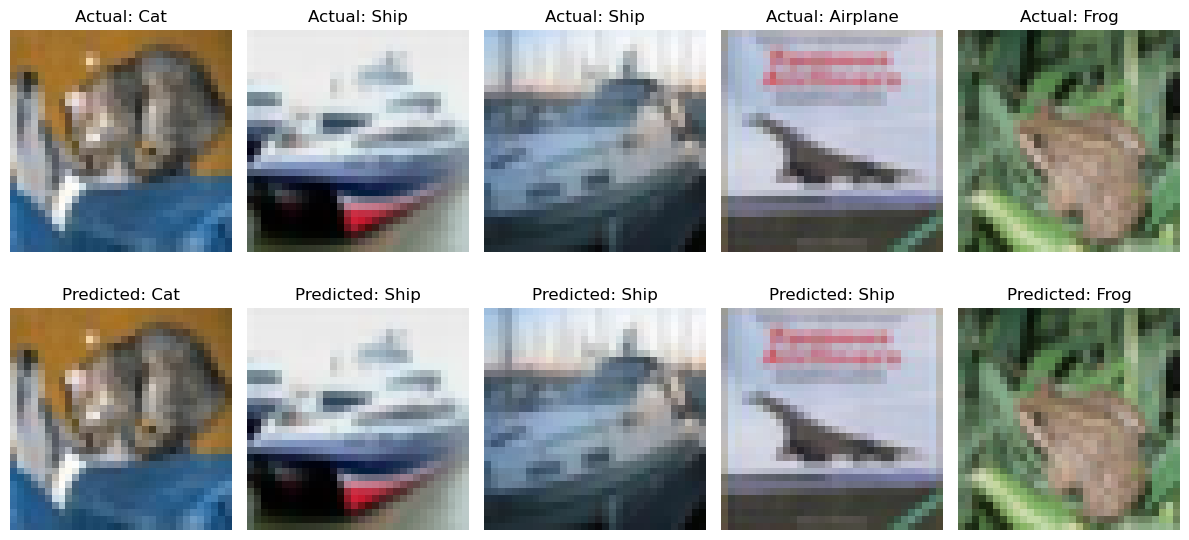

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Class labels for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Step 1: Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Preprocess the data
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)  # Save original y_test for display

# Step 3: Build the CNN Model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f'Test accuracy: {test_accuracy:.4f}')

# Step 6: Make predictions
predictions = model.predict(x_test)

# Step 7: Display Actual vs. Predicted Images with Class Names
num_images = 5  # Number of images to display
plt.figure(figsize=(12, 6))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)  # Actual images
    plt.imshow(x_test[i])
    actual_label = class_names[y_test[i][0]]  # Get the actual class name
    plt.title(f'Actual: {actual_label}')
    plt.axis('off')
    
    plt.subplot(2, num_images, i + 1 + num_images)  # Predicted images
    predicted_label = class_names[np.argmax(predictions[i])]  # Get the predicted class name
    plt.imshow(x_test[i])
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()